In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!curl -L https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml -o models/haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0   644k      0  0:00:01  0:00:01 --:--:--  644k


In [20]:
def show_img(img, gray=False, title="Imagen"):
    """
    Muestra una imagen en Jupyter Notebook usando matplotlib.
    
    Parámetros:
    -----------
    img : ndarray
        Imagen cargada con cv2.imread o procesada.
    gray : bool, opcional (default=False)
        Si True, muestra en escala de grises.
    title : str, opcional
        Título de la imagen.
    """
    plt.figure(figsize=(6,6))
    
    if gray:
        # Mostrar en escala de grises
        plt.imshow(img, cmap="gray")
    else:
        # Convertir de BGR a RGB antes de mostrar
        # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    
    plt.title(title)
    plt.axis("off")
    plt.show()


In [8]:
# Cargar el Modelo
face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')

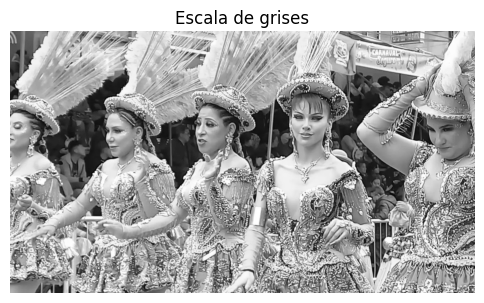

In [23]:
# Leer las imagenes
img_path = 'images/orurobaile.jpg'
img_rostros = cv2.imread(img_path)
img_rostros = cv2.cvtColor(img_rostros, cv2.COLOR_BGR2RGB)
gray_rostros = cv2.cvtColor(img_rostros, cv2.COLOR_RGB2GRAY)
show_img(gray_rostros, gray=True, title="Escala de grises")

In [24]:
# Detección de Objetos
# escala: 1:1
# k-neighbor: vecinos
# 
faces = face_cascade.detectMultiScale(gray_rostros, 1.1, 5)

In [25]:
# Important to show where are the faces ?
# we should draw rectangles
for (x,y,w,h) in faces:
    cv2.rectangle(img_rostros, (x,y), (x+w, y+h), (255, 0, 0), 2)

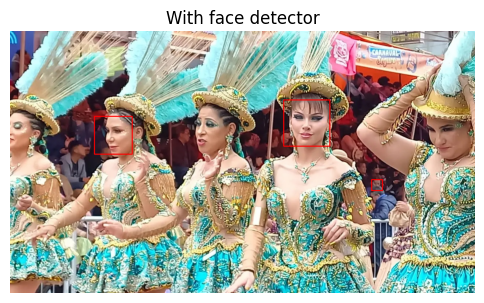

In [26]:
show_img(img_rostros, gray=False, title="With face detector")

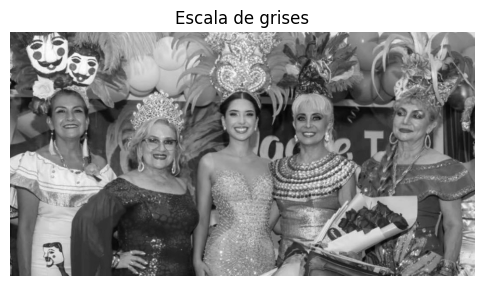

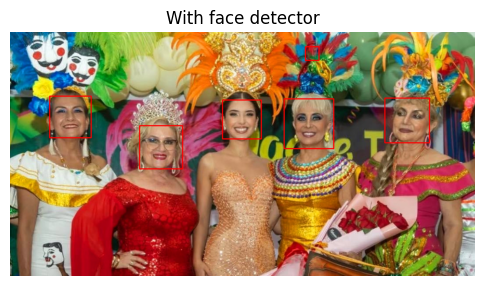

In [52]:
# Leer las imagenes opcionB
img_path = 'images/carnavalsantacruz.jpg'
img_rostros = cv2.imread(img_path)
img_rostros = cv2.cvtColor(img_rostros, cv2.COLOR_BGR2RGB)
gray_rostros = cv2.cvtColor(img_rostros, cv2.COLOR_RGB2GRAY)
show_img(gray_rostros, gray=True, title="Escala de grises")

# Detección de Objetos
# escala: 1:1
# k-neighbor: vecinos
# 
faces = face_cascade.detectMultiScale(gray_rostros, 1.1, 5)

# Important to show where are the faces ?
# we should draw rectangles
for (x,y,w,h) in faces:
    cv2.rectangle(img_rostros, (x,y), (x+w, y+h), (255, 0, 0), 2)

show_img(img_rostros, gray=False, title="With face detector")

## Detección de Rostros : RNC (Redes Neuronales Convolucionales)

In [66]:
architecture_model_path = 'models/deploy.prototxt.txt'
core_model_path = 'models/res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(architecture_model_path, core_model_path)
img_rostros_path = 'images/equipo_darlyn.jpeg'
img_cnn_rostros = cv2.imread(img_rostros_path)
img_cnn_rostros = cv2.cvtColor(img_cnn_rostros, cv2.COLOR_BGR2RGB)
(h,w) = img_cnn_rostros.shape[:2]
# debido que la imagen es muy pesada o grande, entonces para aumentar el tiempo de procesamientos re-dimensionar la imagen.
# 
blob = cv2.dnn.blobFromImage(cv2.resize(img_cnn_rostros, (300,300)), 1.0, (300,300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

In [67]:
rostros_detectados_cnn = 0
for i in range(0, detections.shape[2]):
    # extraigo la confianza (proababilidad) de cada detección)
    confidence = detections[0, 0, i, 2]
    print('confidence', i, confidence)
    if confidence > 0.11:
        rostros_detectados_cnn += 1
        # coordenadas (x,y) del cuadro limitador
        box = detections[0,0,i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Dibujo el cuadro delimitador y la confianza de la detección
        text = f"{confidence * 100:.2f}%"
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(img_cnn_rostros, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(img_cnn_rostros, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

confidence 0 0.12927854
confidence 1 0.12852356
confidence 2 0.12753724
confidence 3 0.12544061
confidence 4 0.122880936
confidence 5 0.12247353
confidence 6 0.121860825
confidence 7 0.12155299
confidence 8 0.12122934
confidence 9 0.12104575
confidence 10 0.120980434
confidence 11 0.12042274
confidence 12 0.11944188
confidence 13 0.118699946
confidence 14 0.11729565
confidence 15 0.1170366
confidence 16 0.11670697
confidence 17 0.1164829
confidence 18 0.116226114
confidence 19 0.1157955
confidence 20 0.115516186
confidence 21 0.11516145
confidence 22 0.114976354
confidence 23 0.11458009
confidence 24 0.11432738
confidence 25 0.11417258
confidence 26 0.114014015
confidence 27 0.11392782
confidence 28 0.11384573
confidence 29 0.11289623
confidence 30 0.11287161
confidence 31 0.11284079
confidence 32 0.11267048
confidence 33 0.11260284
confidence 34 0.11252517
confidence 35 0.112490945
confidence 36 0.11249079
confidence 37 0.112466566
confidence 38 0.11231495
confidence 39 0.11225265
con

In [68]:
print("Total Rostros Detectados", rostros_detectados_cnn)

Total Rostros Detectados 57


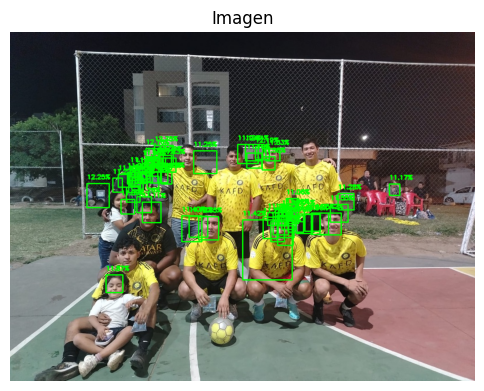

In [69]:
show_img(img_cnn_rostros, "Detección de Rostros usando CNN")